In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [22]:
def omega2w(omega, p, t):
    ''' converts vertical velocity from pressure coords
        to m/s.
        
        input:
         - omega : array in units of Pa/s
         - p     : pressure array in Pa
         - t     : temperature array in K
        output:
         - w     : vertical velocity array in units of m/s
    '''
    R    = 287.058
    G    = 9.80665
    rho = p / (R*t)
    w = -omega/(rho*G)
    return w

In [14]:
iop_dir = "/glade/work/sturbeville/E3SM/inputdata/atm/cam/scam/iop/"
# iop_file = "RCE_iopfile_4scam_no-mean-ascent.nc"
iop_file = "RCE_iopfile_4scam_smooth_w_profile.nc"


In [15]:
iop = xr.open_dataset(iop_dir+iop_file)
iop
iop = iop.isel(lat=0).isel(time=0).isel(lon=0)


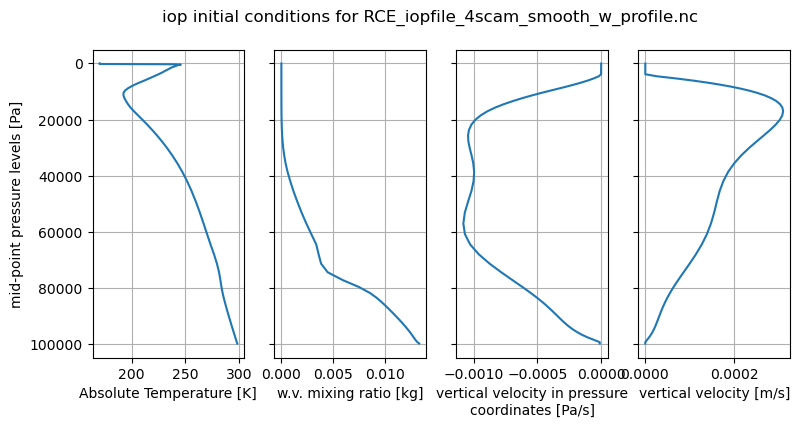

In [32]:
# plot vertical profiles of each initial condition in iop file side-by-side
fig, ax = plt.subplots(1,4, figsize=(9,4), sharey=True)
iop["T"].plot(ax=ax[0], y="lev")
iop.q.plot(ax=ax[1], y="lev")
iop.omega.plot(ax=ax[2], y="lev")
w = omega2w(iop.omega, iop.lev, iop["T"])
w.plot(ax=ax[3], y="lev")
ax[3].set(xlabel="vertical velocity [m/s]")
# iop.divT.plot(ax=ax[3], y="lev")
# iop.divq.plot(ax=ax[4], y="lev")
# iop.u.plot(ax=ax[5], y="lev")
# ax6 = ax[5].twiny()
# iop.v.plot(ax=ax6, y="lev")

for i in range(4):
    ax[i].set(title="")
    ax[i].grid(True)
    if i>0:
        ax[i].set(ylabel="")

ax[0].invert_yaxis()
# ax[0].set_yscale("log")
fig.suptitle("iop initial conditions for "+iop_file)
plt.savefig("../plots/iop_ic_{}.png".format(iop_file.split(".")[0]))
plt.show()